# Using Keras on the Fashion MNIST Dataset

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install deap #https://deap.readthedocs.io/en/master/overview.html

# algo
import tensorflow as tf
from tensorflow import keras

# data
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

     |████████████████████████████████| 163kB 4.8MB/s 


In [3]:
# version check
print(f'Tensorflow Version: {tf.__version__}')
print(f'Keras Version:      {keras.__version__}')

Tensorflow Version: 2.2.0
Keras Version:      2.3.0-tf


### Data review

In [41]:
# data review
X_train_full.shape
#y_train_full.shape

(60000, 28, 28)

In [0]:
# scale input features to 0-1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [74]:
#
key = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
       5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

key[0]

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

class_names[X_train[0]]

TypeError: ignored

### Sequential API

In [0]:
#
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation='relu'),
                                keras.layers.Dense(100, activation='relu'),
                                keras.layers.Dense(10, activation='softmax')])


In [76]:
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
#
model.layers

In [77]:
# layer review
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [78]:
model.get_layer('dense_6') is hidden1

True

In [79]:
#
weights, biases = hidden1.get_weights()

print(f'weights shape:  {weights.shape}')
print(f'biases shape:   {biases.shape}')

weights shape:  (784, 300)
biases shape:   (300,)


### Compile the model

In [0]:
#
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

### Fit the model to the selected data

In [82]:
# store history of model epochs
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5054 - accuracy: 0.8169 - val_loss: 0.4278 - val_accuracy: 0.8452
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3921 - accuracy: 0.8611 - val_loss: 0.4041 - val_accuracy: 0.8644
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3721 - accuracy: 0.8698 - val_loss: 0.3790 - val_accuracy: 0.8822
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3606 - accuracy: 0.8758 - val_loss: 0.3933 - val_accuracy: 0.8760
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3477 - accuracy: 0.8795 - val_loss: 0.4555 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3431 - accuracy: 0.8826 - val_loss: 0.4170 - val_accuracy: 0.8770
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.8847 - val_loss: 0.4590 - val_accuracy:

### plot learning metrics

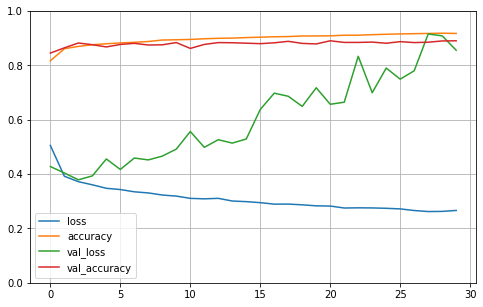

{'verbose': 1, 'epochs': 30, 'steps': 1719}


In [83]:
# plt model metrics
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(f'{history.params}')

In [84]:
# evaluate model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 274.7415 - accuracy: 0.8694


[274.7415466308594, 0.8694000244140625]

In [0]:
# save model
model.save('FMNIST-RMSProp-two-dense-model.h5')